In [1]:
import sys
import os
import mlflow

# Add src to path
sys.path.append(os.path.abspath('../src'))

from model_training import ModelTrainer


In [2]:
DATA_PATH = '../data/processed/final_dataset_with_target.csv'

In [3]:
trainer = ModelTrainer(DATA_PATH)
X_train, X_test, y_train, y_test = trainer.prepare_data()

✅ Data Split: Train shape (2993, 23), Test shape (749, 23)


In [4]:
metrics_lr = trainer.train_model(
    model_type='logistic', 
    params={'max_iter': 1000, 'random_state': 42},
    experiment_name="Credit_Risk_Prediction"
)

2025/12/17 12:25:29 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/17 12:25:29 INFO mlflow.store.db.utils: Updating database tables
2025/12/17 12:25:29 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/17 12:25:29 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/17 12:25:30 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/17 12:25:30 INFO alembic.runtime.migration: Will assume non-transactional DDL.


🔄 Training logistic...


2025/12/17 12:25:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Training Complete. Metrics: {'accuracy': 0.6862483311081442, 'precision': 0.6050420168067226, 'recall': 0.5052631578947369, 'f1_score': 0.5506692160611855, 'roc_auc': 0.7486690865093768}


In [5]:
metrics_rf = trainer.train_model(
    model_type='random_forest',
    params={'n_estimators': 100, 'random_state': 42},
    experiment_name="Credit_Risk_Prediction"
)

🔄 Training random_forest...


2025/12/17 12:25:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Training Complete. Metrics: {'accuracy': 0.739652870493992, 'precision': 0.6771653543307087, 'recall': 0.6035087719298246, 'f1_score': 0.6382189239332097, 'roc_auc': 0.8283839987900787}


In [6]:
metrics_xgb = trainer.train_model(
    model_type='xgboost',
    params={'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5},
    experiment_name="Credit_Risk_Prediction"
)

🔄 Training xgboost...


2025/12/17 12:26:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Training Complete. Metrics: {'accuracy': 0.7369826435246996, 'precision': 0.6437908496732027, 'recall': 0.6912280701754386, 'f1_score': 0.6666666666666666, 'roc_auc': 0.8280512704174228}


In [7]:
best_run_id, best_model_type, best_score = trainer.find_best_model(
    experiment_name="Credit_Risk_Prediction",
    metric="roc_auc"
)

print(f"The best model is: {best_model_type.upper()}")
print(f"ROC-AUC Score: {best_score:.5f}")

🔍 Searching for best model in experiment: 'Credit_Risk_Prediction' based on roc_auc...
The best model is: RANDOM_FOREST
ROC-AUC Score: 0.82838


In [8]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

In [9]:
best_params = trainer.hyperparameter_tuning("random_forest", param_grid)

🔄 Starting Hyperparameter Tuning for random_forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
metrics_tuned = trainer.train_model(
    model_type='random_forest',
    params=best_params,
    experiment_name="Credit_Risk_Prediction"
)

🔄 Training random_forest...


2025/12/17 12:26:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Training Complete. Metrics: {'accuracy': 0.7463284379172229, 'precision': 0.6537216828478964, 'recall': 0.7087719298245614, 'f1_score': 0.6801346801346801, 'roc_auc': 0.8268829401088928}


--- Feature Importance ---


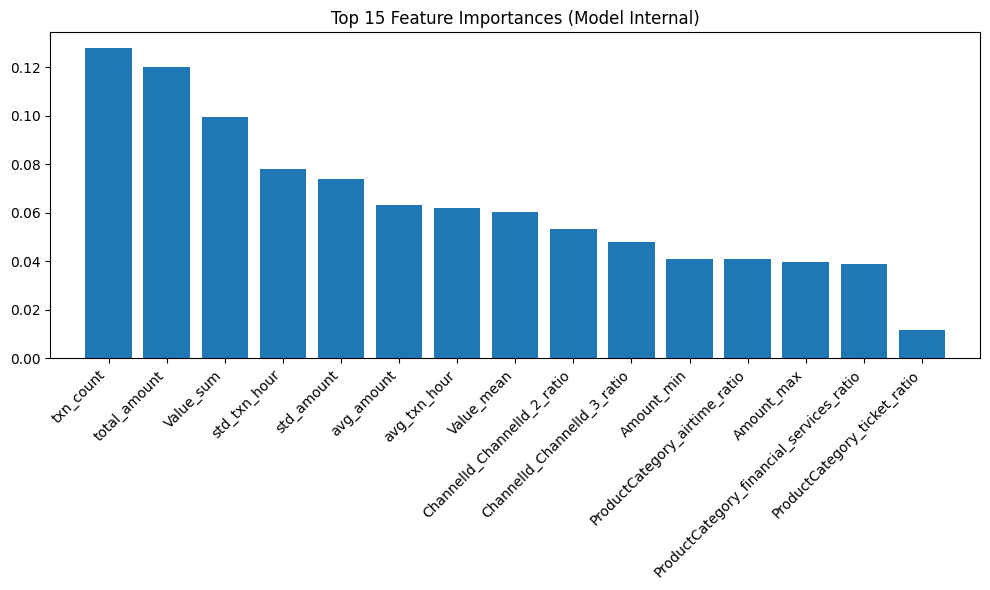

In [11]:
print("--- Feature Importance ---")
trainer.plot_feature_importance()

--- ROC Curve ---


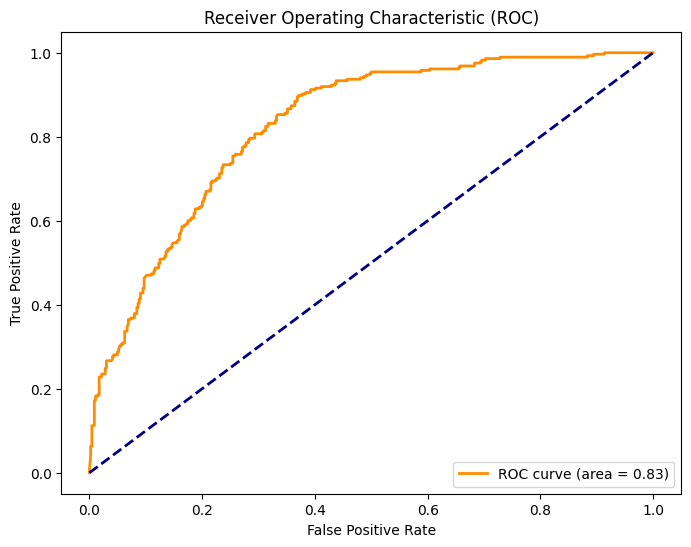

In [12]:
print("--- ROC Curve ---")
trainer.plot_roc_curve()

--- Precision-Recall Curve ---


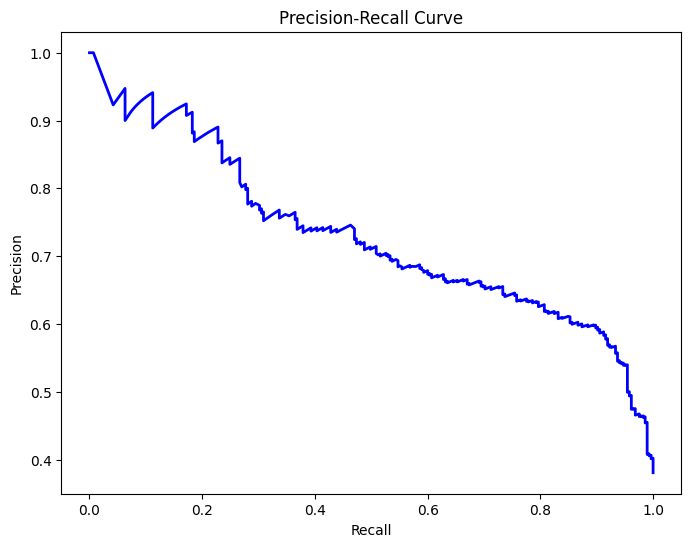

In [13]:
print("--- Precision-Recall Curve ---")
trainer.plot_precision_recall_curve()

--- Confusion Matrix ---


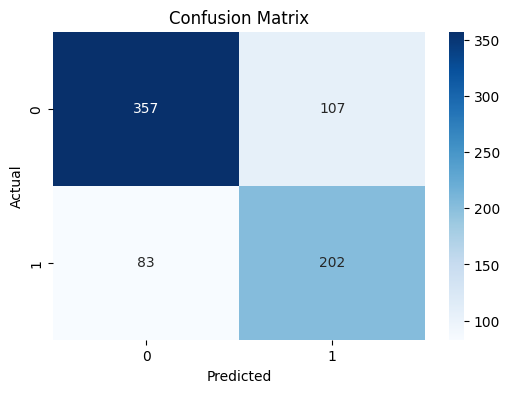

In [14]:
print("--- Confusion Matrix ---")
trainer.plot_confusion_matrix()

In [15]:
trainer.register_model(run_id=best_run_id, model_name="CreditRiskModel")

2025/12/17 12:32:09 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/17 12:32:09 INFO mlflow.store.db.utils: Updating database tables


📝 Registering Run ID 7c7ee85a490d4826b809541223f6e83f as 'CreditRiskModel'...


2025/12/17 12:32:09 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/17 12:32:09 INFO alembic.runtime.migration: Will assume non-transactional DDL.
Successfully registered model 'CreditRiskModel'.
2025/12/17 12:32:10 WARNING mlflow.tracking._model_registry.fluent: Run with id 7c7ee85a490d4826b809541223f6e83f has no artifacts at artifact path 'model', registering model based on models:/m-c7fb045bf78a408db329b7c44e4221e6 instead
Created version '1' of model 'CreditRiskModel'.


✅ Model registered successfully.


📊 Calculating IV for all features...
                                     Feature        IV           Strength
3                                  txn_count  0.840771  Suspicious (>0.5)
6                                  Value_sum  0.611129  Suspicious (>0.5)
21               ChannelId_ChannelId_3_ratio  0.570586  Suspicious (>0.5)
20               ChannelId_ChannelId_2_ratio  0.555270  Suspicious (>0.5)
9                               std_txn_hour  0.510871  Suspicious (>0.5)
0                               total_amount  0.506099  Suspicious (>0.5)
2                                 std_amount  0.408278             Strong
4                                 Amount_min  0.393677             Strong
10             ProductCategory_airtime_ratio  0.344366             Strong
12  ProductCategory_financial_services_ratio  0.342921             Strong
5                                 Amount_max  0.262475             Medium
7                                 Value_mean  0.217079             Medium
8

c:\Users\Abenezer\Desktop\KAIM Project\Credit_Risk_Probability_Model_for_Alternative_Data\src\model_training.py:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IV', y='Feature', data=iv_df, palette='viridis')


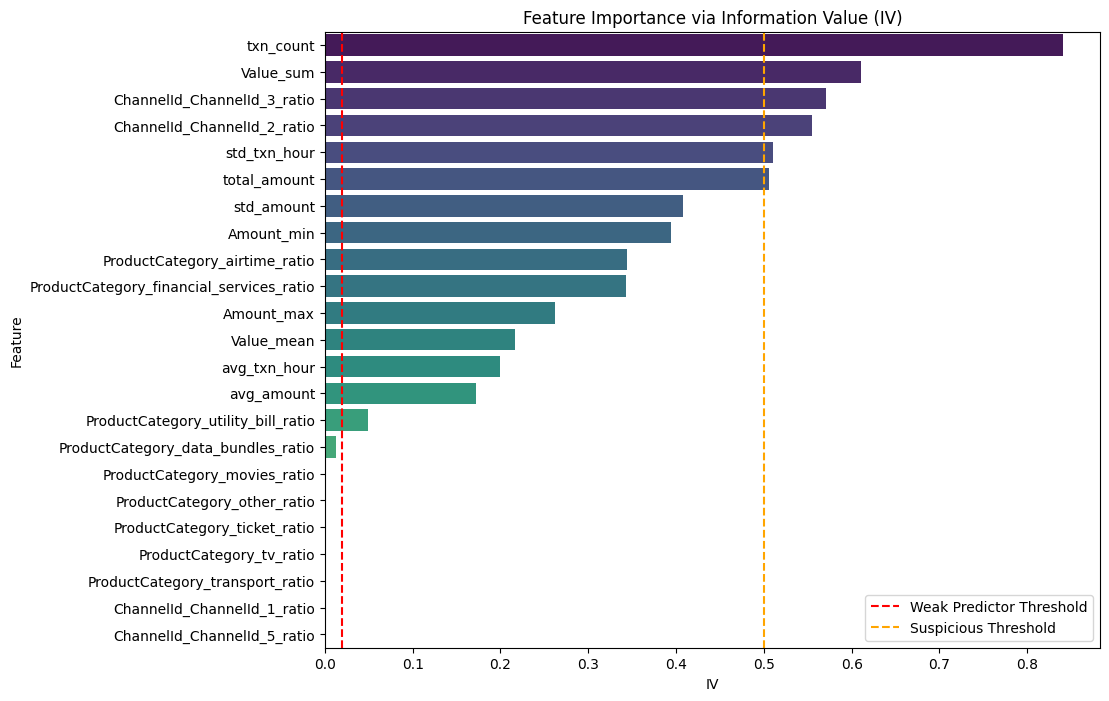

In [16]:
# Calculate IV for all features
iv_df = trainer.analyze_feature_iv(target_col='is_high_risk')

In [17]:
import mlflow.sklearn

# Load from Registry (Production stage or just latest version)
loaded_model = mlflow.sklearn.load_model(f"models:/CreditRiskModel/latest")

# Test prediction on one sample
sample = X_test.iloc[[0]]
pred = loaded_model.predict(sample)
prob = loaded_model.predict_proba(sample)

print(f"Test Prediction for sample row 0: Class {pred[0]}, Probability: {prob[0]}")

Test Prediction for sample row 0: Class 1, Probability: [0.00625 0.99375]
